In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
data = pd.read_csv('./train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]/255
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]/255

In [120]:
def init_params():
    W1 = np.random.randn(10,784)*0.01
    b1 = np.random.randn(10,1)*0.01
    W2 = np.random.randn(10,10)*0.01
    b2 = np.random.randn(10,1)*0.01
    return W1,b1,W2,b2

In [121]:
def ReLU(Z):
    return np.maximum(0,Z)

In [122]:
def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))  

In [123]:
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [124]:
def one_hot_encd(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

In [125]:
def Cost_func(A2,Y):
    m=Y.shape[0]
    return (-1/m)*np.sum(one_hot_encd(Y)*np.log(A2))

In [126]:
def deriv_ReLU(Z):
    return Z>0

In [127]:
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot_encd(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m)*(dZ2.dot(A1.T))
    db2 = np.sum(dZ2)/m
    dZ1 = (W2.T.dot(dZ2))*(deriv_ReLU(Z1))
    dW1 = dZ1.dot(X.T)/m
    db1 = np.sum(dZ1)/m
    return dW1, db1, dW2, db2

In [128]:
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,learn_rate):
    W1 -= learn_rate*dW1
    b1 -= learn_rate*db1
    W2 -= learn_rate*dW2
    b2 -= learn_rate*db2
    return W1,b1,W2,b2

In [129]:
def get_pred(A2):
    return np.argmax(A2,0)

In [130]:
def get_acc(predictions, Y):
    return np.sum(predictions==Y)*100/Y.size

In [131]:
def grad_desc(X, Y, iterations, learn_rate):
    W1,b1,W2,b2 = init_params()
    costs =[]
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        cost = Cost_func(A2,Y)
        costs.append(cost)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,learn_rate)
        
        if(i%1000==0):
            print(f"Cost after {i} iterations: {cost}")
    plt.plot(costs)
    plt.show()   
    return W1,b1,W2,b2

Cost after 0 iterations: 2.3027284919817674
Cost after 1000 iterations: 0.30082184574510656
Cost after 2000 iterations: 0.252486213459353
Cost after 3000 iterations: 0.23090654338511707
Cost after 4000 iterations: 0.21638333393092363
Cost after 5000 iterations: 0.20558613787791832
Cost after 6000 iterations: 0.19661005714346824
Cost after 7000 iterations: 0.1890894551648199
Cost after 8000 iterations: 0.18283678207533408
Cost after 9000 iterations: 0.17776381449445372


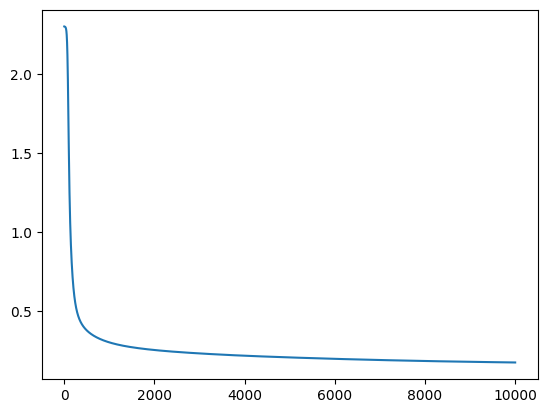

In [132]:
W1,b1,W2,b2 = grad_desc(X_train,Y_train,10000,0.1)

In [135]:
def make_pred(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    return get_pred(A2)
def train_pred(W1,b1,W2,b2):
    prediction = make_pred(X_train,W1,b1,W2,b2)
    print("Train accuracy: ", get_acc(prediction,Y_train))
def test_pred(W1,b1,W2,b2):
    prediction = make_pred(X_dev,W1,b1,W2,b2)
    print("Test accuracy: ", get_acc(prediction,Y_dev))
    


In [136]:
train_pred(W1,b1,W2,b2)
test_pred(W1,b1,W2,b2)

Train accuracy:  95.13170731707316
Test accuracy:  93.6
